In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.signal as ss
import h5py

def zscore(x):
    return (x-np.mean(x))/np.std(x)

In [2]:
segs = pd.read_csv('L5Segments.csv')
segs_degrees = pd.read_csv('SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
segs['segmentID'] = segs.index
segs = segs.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()
segs['Sec ID'] = segs['Sec ID'].astype(int)
segs['X'] = segs['X'].astype(float)

segs['Elec_distanceQ'] = 'None'

segs.loc[segs.Type=='dend','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='dend','Elec_distance'], 10, labels=False)
segs.loc[segs.Type=='apic','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='apic','Elec_distance'], 10, labels=False)

In [4]:
spks_control = h5py.File('./output_control/spikes.h5','r')
spks_64Hz_soma = h5py.File('./output_64Hz_soma_inh/spikes.h5','r')
spks_16Hz_soma = h5py.File('./output_16Hz_soma_inh/spikes.h5','r')
spks_16Hz_dend = h5py.File('./output_16Hz_dend_inh/spikes.h5','r')

v_control = h5py.File('./output_control/v_report.h5','r')
v_64Hz_soma = h5py.File('./output_64Hz_soma_inh/v_report.h5','r')
v_16Hz_soma = h5py.File('./output_16Hz_soma_inh/v_report.h5','r')
v_16Hz_dend = h5py.File('./output_16Hz_dend_inh/v_report.h5','r')

In [97]:
spks_64Hz_soma['spikes']['biophysical']['timestamps'][:].shape[0]/150

5.8533333333333335

In [98]:
spks_16Hz_soma['spikes']['biophysical']['timestamps'][:].shape[0]/150

11.08

Text(0.5, 1.0, 'Electrotonic distance')

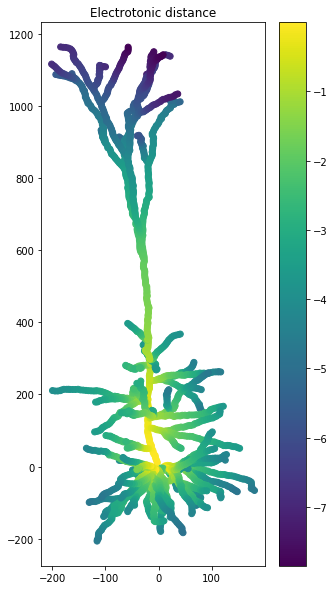

In [5]:
plt.figure(figsize=(5,10))

plt.scatter(segs.loc[segs.Elec_distanceQ!='None','Coord X'], 
            segs.loc[segs.Elec_distanceQ!='None','Coord Y'],
            c = np.log(segs.loc[segs.Elec_distanceQ!='None','Elec_distance']))
plt.colorbar()    
plt.title('Electrotonic distance')

Text(0, 0.5, 'distance (um)')

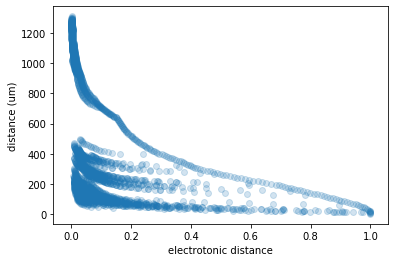

In [6]:
plt.scatter(segs['Elec_distance'],segs['Distance'],alpha=0.2)
plt.xlabel('electrotonic distance')
plt.ylabel('distance (um)')

## How does the average membrane potential change as a function of the phase of inhibition?

### 64 Hz

In [7]:
## Get PSD of mean membrane potential by electrotonic distance

In [8]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

0
1
2
3
4
5
6
7
8
9


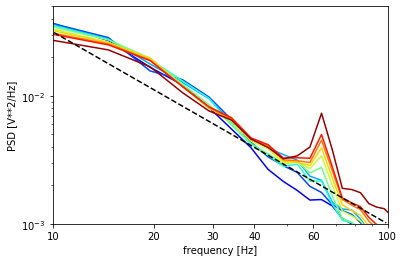

In [65]:
colors = cmaplist[::25]

fs = 10000

F = []
P = []
for i in np.arange(0,10):
    print(i)
    segments = np.sort(segs[segs.Elec_distanceQ==i]['segmentID'].values)
    x = v_64Hz_soma['report']['biophysical']['data'][0:150000,segments]
    f, Pxx_den = ss.welch(zscore(x.mean(axis=1)), fs, nperseg=2048)
    F.append(f)
    P.append(Pxx_den)
    plt.loglog(f, Pxx_den,color=colors[i+1])
plt.loglog(np.arange(1,100),1/(np.arange(1,100)**1.5),color='k',linestyle='dashed')
plt.ylim(10e-4, 0.05)
plt.xlim(10,100)
plt.xticks(ticks=[10,20,30,40,60,100],labels=['10','20','30','40','60','100'])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

(-75, -50)

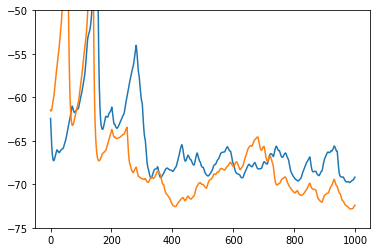

In [73]:
plt.plot(v_64Hz_soma['report']['biophysical']['data'][3000:4000,0])
plt.plot(v_16Hz_soma['report']['biophysical']['data'][3000:4000,0])
plt.ylim(-75,-50)

Text(0.5, 0, 'time (ms)')

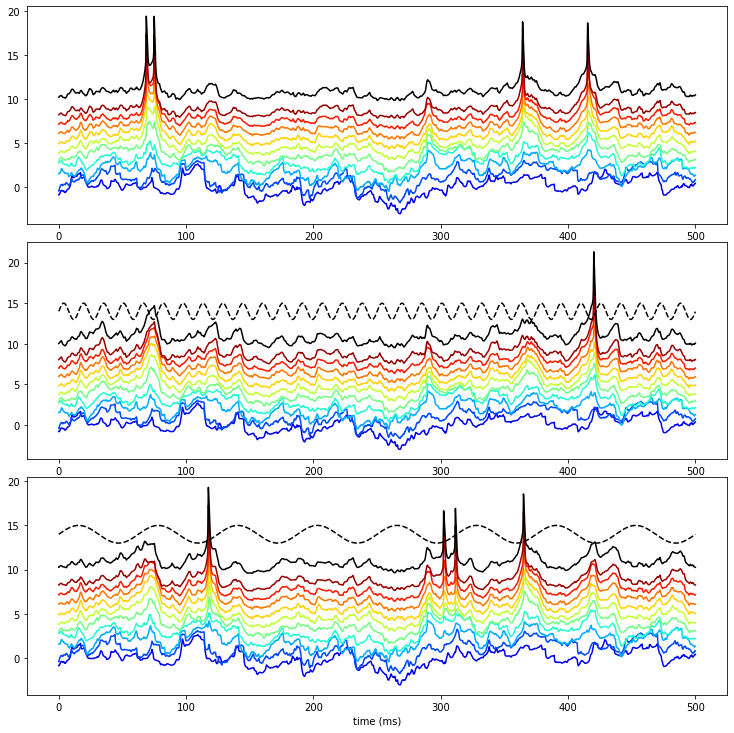

In [112]:
plt.figure(figsize=(10,10),tight_layout={'pad':0,'h_pad':0,'w_pad':0,'rect':None})

plt.subplot(3,1,1)
for i in np.arange(0,10):
    segments = np.sort(segs[segs.Elec_distanceQ==i]['segmentID'].values)
    x = v_control['report']['biophysical']['data'][5000:10000,segments]
    plt.plot(np.arange(0,500,.1),i+zscore(x.mean(axis=1)),color=colors[i+1])
plt.plot(np.arange(0,500,.1),11+zscore(v_control['report']['biophysical']['data'][5000:10000,segments].mean(axis=1)),'k')
#plt.plot(np.arange(0,500,.1),14+np.sin(2*np.pi*(64/1000)*np.arange(0,500,.1)),color='k',linestyle='dashed')

plt.subplot(3,1,2)
for i in np.arange(0,10):
    segments = np.sort(segs[segs.Elec_distanceQ==i]['segmentID'].values)
    x = v_64Hz_soma['report']['biophysical']['data'][5000:10000,segments]
    plt.plot(np.arange(0,500,.1),i+zscore(x.mean(axis=1)),color=colors[i+1])
plt.plot(np.arange(0,500,.1),11+zscore(v_64Hz_soma['report']['biophysical']['data'][5000:10000,segments].mean(axis=1)),'k')
plt.plot(np.arange(0,500,.1),14+np.sin(2*np.pi*(64/1000)*np.arange(0,500,.1)),color='k',linestyle='dashed')

plt.subplot(3,1,3)
for i in np.arange(0,10):
    segments = np.sort(segs[segs.Elec_distanceQ==i]['segmentID'].values)
    x = v_16Hz_soma['report']['biophysical']['data'][5000:10000,segments]
    plt.plot(np.arange(0,500,.1),i+zscore(x.mean(axis=1)),color=colors[i+1])
plt.plot(np.arange(0,500,.1),11+zscore(v_16Hz_soma['report']['biophysical']['data'][5000:10000,segments].mean(axis=1)),'k')
plt.plot(np.arange(0,500,.1),14+np.sin(2*np.pi*(16/1000)*np.arange(0,500,.1)),color='k',linestyle='dashed')
plt.xlabel('time (ms)')




0
1
2
3
4
5
6
7
8
9


Text(0.5, 0, 'time (ms)')

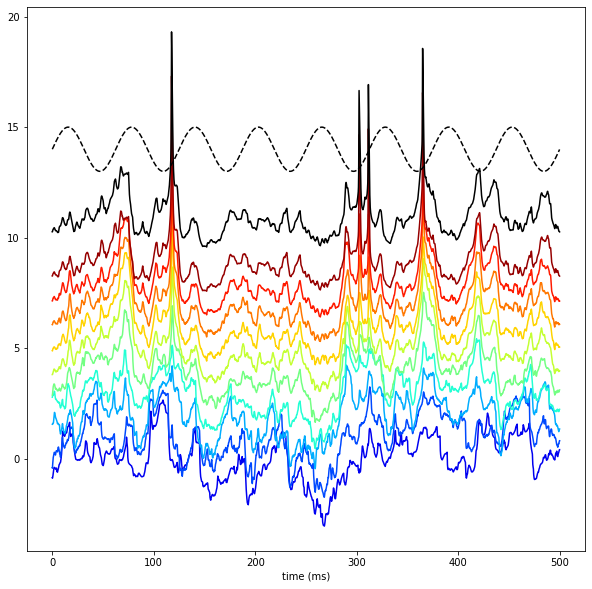

In [95]:
plt.figure(figsize=(10,10))


0
1
2
3
4
5
6
7
8
9


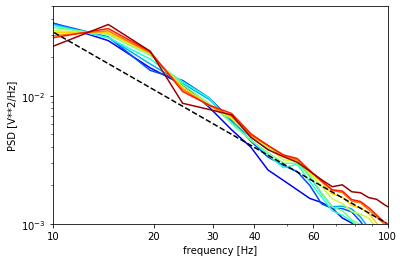

In [68]:
colors = cmaplist[::25]

fs = 10000

F = []
P = []
for i in np.arange(0,10):
    print(i)
    segments = np.sort(segs[segs.Elec_distanceQ==i]['segmentID'].values)
    x = v_16Hz_soma['report']['biophysical']['data'][0:150000,segments]
    f, Pxx_den = ss.welch(zscore(x.mean(axis=1)), fs, nperseg=2048*2)
    F.append(f)
    P.append(Pxx_den)
    plt.loglog(f, Pxx_den,color=colors[i+1])
plt.loglog(np.arange(1,100),1/(np.arange(1,100)**1.5),color='k',linestyle='dashed')
plt.ylim(10e-4, 0.05)
plt.xlim(10,100)
plt.xticks(ticks=[10,20,30,40,60,100],labels=['10','20','30','40','60','100'])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Text(0.5, 1.0, 'Electrotonic distance')

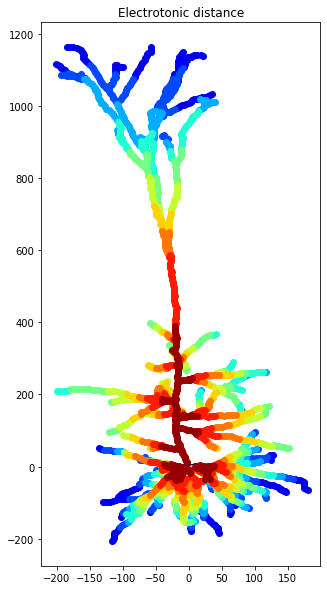

In [38]:
plt.figure(figsize=(5,10))
plt.scatter(segs.loc[segs.Type=='soma','Coord X'], 
            segs.loc[segs.Type=='soma','Coord Y'],
            color=colors[0])

for i in np.arange(0,10):
    plt.scatter(segs.loc[segs.Elec_distanceQ==i,'Coord X'], 
            segs.loc[segs.Elec_distanceQ==i,'Coord Y'],
            color=colors[i+1])
#plt.colorbar()    
plt.title('Electrotonic distance')

In [ ]:
negpi_vals = v_64Hz_soma['report']['biophysical']['data'][negpi_inds,:]
negpi2_vals = v_64Hz_soma['report']['biophysical']['data'][negpi2_inds,:]
zero_vals = v_64Hz_soma['report']['biophysical']['data'][zero_inds,:]
pi2_vals = v_64Hz_soma['report']['biophysical']['data'][pi2_inds,:]

In [43]:
segs_meanvals = pd.DataFrame(np.concatenate((np.arange(0,2a526).reshape(-1,1).astype(int),
                                     np.mean(negpi_vals,axis=0).reshape(-1,1),
                                     np.mean(negpi2_vals,axis=0).reshape(-1,1),
                                     np.mean(zero_vals,axis=0).reshape(-1,1),
                                     np.mean(pi2_vals,axis=0).reshape(-1,1)),
                                    axis=1),
             columns=['segmentID','mean_negpi','mean_negpi2','mean_zero','mean_pi2'])

In [50]:
segs_mempot = segs.set_index('segmentID').join(segs_meanvals.set_index('segmentID')).reset_index()

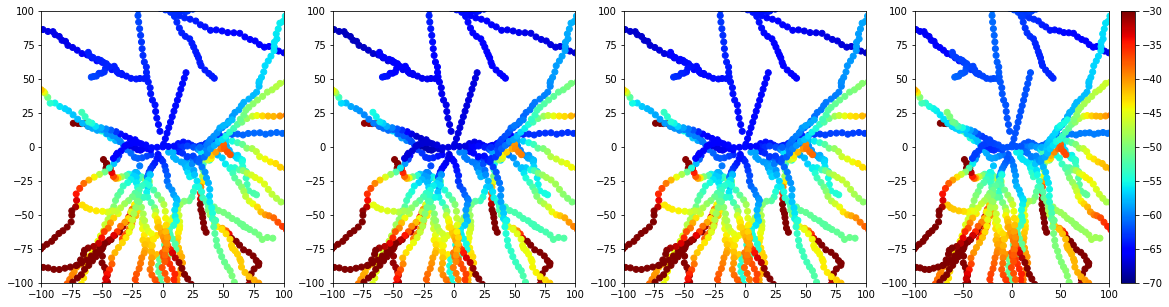

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(segs_mempot['Coord X'], 
            segs_mempot['Coord Y'],
            c = segs_mempot['mean_negpi'],
            vmin=-70,
            vmax=-30,
            cmap='jet')
plt.ylim(-100,100)
plt.xlim(-100,100)

plt.subplot(1,4,2)
plt.scatter(segs_mempot['Coord X'], 
            segs_mempot['Coord Y'],
            c = segs_mempot['mean_negpi2'],
            vmin=-70,
            vmax=-30,
            cmap='jet')
plt.ylim(-100,100)
plt.xlim(-100,100)


plt.subplot(1,4,3)
plt.scatter(segs_mempot['Coord X'], 
            segs_mempot['Coord Y'],
            c = segs_mempot['mean_zero'],
            vmin=-70,
            vmax=-30,
            cmap='jet')
plt.ylim(-100,100)
plt.xlim(-100,100)

plt.subplot(1,4,4)
plt.scatter(segs_mempot['Coord X'], 
            segs_mempot['Coord Y'],
            c = segs_mempot['mean_pi2'],
            vmin=-70,
            vmax=-30,
            cmap='jet')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.colorbar()    


In [73]:
segs_meanvals = pd.DataFrame(np.concatenate((np.arange(0,2526).reshape(-1,1).astype(int),
                                             np.mean(negpi_vals,axis=0).reshape(-1,1)),
                                           axis=1))

In [75]:
for i in np.arange(1,157):
    next_vals = v_64Hz_soma['report']['biophysical']['data'][negpi_inds+i,:]
    segs_meanvals = pd.DataFrame(np.concatenate((segs_meanvals,
                                                 np.mean(next_vals,axis=0).reshape(-1,1)),
                                               axis=1))

In [79]:
segs_meanvals.rename(columns={0:"segmentID"},inplace=True)

In [80]:
segs_mempot = segs.set_index('segmentID').join(segs_meanvals.set_index('segmentID')).reset_index()

In [92]:
segs_mempot[segs_mempot.Elec_distanceQ==9].head()

,segmentID,Type,Sec ID,BMTK ID,X,Distance,Coord X,Coord Y,Coord Z,Elec_distance,...,148,149,150,151,152,153,154,155,156,157
0,1027,apic,0,85,0.055556,14.147771,-2.303151,11.476587,0.071639,0.999627,...,-63.625088,-63.774816,-63.905619,-63.987423,-64.033106,-64.120500,-64.220489,-64.321965,-64.445991,-64.546655
1,1028,apic,0,85,0.166667,19.273949,-3.554566,16.424751,0.046743,0.998422,...,-63.602905,-63.751834,-63.882447,-63.964809,-64.011234,-64.097992,-64.197472,-64.298563,-64.421829,-64.522534
2,1029,apic,0,85,0.277778,24.400128,-4.910495,21.177870,-1.216934,0.996346,...,-63.565588,-63.713218,-63.843422,-63.926545,-63.974091,-64.059930,-64.158594,-64.259032,-64.381085,-64.481765
3,1030,apic,0,85,0.388889,29.526307,-5.852709,26.024932,-2.438397,0.992809,...,-63.504911,-63.650441,-63.779868,-63.864058,-63.913283,-63.997795,-64.095172,-64.194547,-64.314664,-64.415160
4,1031,apic,0,85,0.500000,34.652486,-6.340006,30.845376,-2.985270,0.988541,...,-63.433509,-63.576612,-63.705028,-63.790265,-63.841317,-63.924419,-64.020329,-64.118452,-64.236360,-64.336526


In [87]:
phase_mempot = segs_mempot.groupby('Elec_distanceQ').mean().reset_index()[np.arange(1,150)]

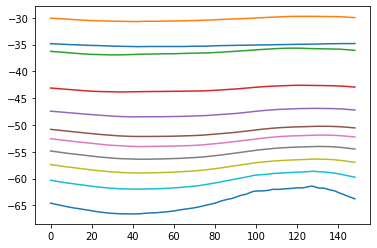

In [97]:
for i in np.arange(0,phase_mempot.shape[0]):
    plt.plot(phase_mempot.values[i,:])


### 16 Hz

In [87]:
# peaks for entire trace
peaks = ss.find_peaks(np.sin(2*np.pi*(16/1000)*np.arange(0,150000,.1)))[0]

T = []
for i in np.arange(0,peaks.shape[0]-1):
    #if np.mod(i,100)==0:
    #    print(i)
    
    trace = v_16Hz_dend['report']['biophysical']['data'][np.arange(peaks[i],peaks[i+1]),0]
    #if trace.shape[0]<630:
    #    trace = np.concatenate((trace,[np.mean(trace)]))
    T.append(trace)
    

In [88]:
for i in np.arange(0,10):
    print(len(T[i]))

625
625
625
625
625
625
625
625
625
625


(0, 10000)

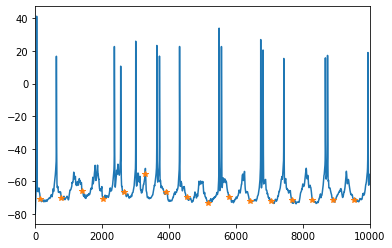

In [81]:
plt.plot(v_16Hz_dend['report']['biophysical']['data'][:,0])
plt.plot(peaks,v_16Hz_dend['report']['biophysical']['data'][:,0][peaks],'*')
plt.xlim(0,10000)

In [90]:
soma = np.reshape(T,(len(T),625))

In [91]:
soma.shape

(2399, 625)

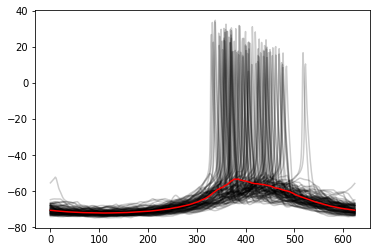

In [92]:
for i in np.arange(0,100):
    plt.plot(T[i],color='k',alpha=0.2)
    
plt.plot(np.mean(soma,axis=0),color='r')